# Coding Task 1

## Anggota Kelompok
1. Kanafira Vanesha Putri   - 5027241010
2. Ardhi Putra Pradana      - 5027241022
3. Khumaidi Kharis Az-zacky - 5027241049
4. Imam Mahmud Dalil Fauzan - 5027241100

## Data Preparation

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [196]:
df = pd.read_excel('../datasets/dataset_1.xlsx')
df
"""
Column name mapping

Tanggal          ->  date
Curah Hujan (mm) ->  rainfall
Penjualan A      ->  sale_a
Penjualan B      ->  sale_b
"""
df.columns = ['date', 'rainfall', 'sale_a', 'sale_b']
df

,date,rainfall,sale_a,sale_b
0,1,1.4,0,507
1,2,1.2,27,61
2,3,15.2,458,367
3,4,13.4,20,21
4,5,7.7,7,0
...,...,...,...,...
116,4,2.2,430,421
117,5,0.5,208,24
118,6,33.4,200,189
119,7,0.0,0,324


## Exploratory Data

### Mean, Modus, Median

In [197]:
def draw_patch_text(ax: plt.Axes, data: list, offset: int = 0):
    len_patches = len(list(ax.patches))
    assert len(data) == len_patches, f"Data length must be equal to the number of patches, expected {len_patches}, got {len(data)}"
    for idx, patch in enumerate(ax.patches):
        ax.text(
            patch.get_x() + patch.get_width() / 2,
            patch.get_height() + offset,
            data[idx],
            fontsize=14,
            fontweight='bold',
            color='white',
            ha='center',
            va='bottom'
        )

In [198]:
"""
Mean

Mencari rata - rata dari setiap data penjualan dari produk A dan B
"""

def process_mean(ax: plt.Axes):
    mean_sale_a = df['sale_a'].mean()
    mean_sale_b = df['sale_b'].mean()
    data = {
        'Produk': ['A', 'B'],
        'Mean': [mean_sale_a, mean_sale_b]
    }

    ax.set_title(
        label="Rata - rata penjualan produk A dan B",
        size=20,
        pad=30
    )

    sns.barplot(
        ax=ax,
        data=data,
        x='Produk',
        y='Mean',
        palette="GnBu",
        hue='Produk',
    )

    ax.axhline(y=mean_sale_a, color='red', linewidth=2, linestyle='--')
    ax.axhline(y=mean_sale_b, color='red', linewidth=2, linestyle='--')

    draw_patch_text(ax=ax, data=[f'{mean_sale_a:.2f}', f'{mean_sale_b:.2f}'], offset=-50)

In [199]:
"""
Modus

Mencari modus dari setiap data penjualan dari produk A dan B
"""
def process_modus(ax: plt.Axes):
    mode_sale_a = df['sale_a'][df['sale_a'] != 0].mode().values[0]
    mode_sale_b = df['sale_b'][df['sale_b'] != 0].mode().values[0]
    amount_sale_a = df['sale_a'][df['sale_a'] == mode_sale_a].count().astype(int)
    amount_sale_b = df['sale_b'][df['sale_b'] == mode_sale_b].count().astype(int)
    data = {
        'Amount': [f'{mode_sale_a} (A)', f'{mode_sale_b} (B)'],
        'Mode': [amount_sale_a, amount_sale_b],
    }

    ax.set_title(
        label="Modus penjualan produk A dan B",
        size=20,
        pad=30
    )

    sns.barplot(
        ax=ax,
        data=data,
        x='Amount',
        y='Mode',
        palette="GnBu",
        hue='Amount',
    )

    ax.axhline(y=amount_sale_a, color='red', linestyle='--')
    ax.axhline(y=amount_sale_b, color='red', linestyle='--')

    draw_patch_text(ax=ax, data=[amount_sale_a, amount_sale_b], offset=-1)

In [200]:
"""
Median

Mencari median atau nilai tengah dari setiap data penjualan dari produk A dan B
"""
def process_median():
    median_sale_a = df['sale_a'].median().astype(int)
    median_sale_b = df['sale_b'].median().astype(int)
    
    df_median = pd.DataFrame({
        'Produk': ['A', 'B'],
        'Median': [median_sale_a, median_sale_b]
    })
    print(" Median penjualan produk A dan B ".center(50, "="))
    print(df_median.to_string(index=False))
    print(" Median penjualan produk A dan B ".center(50, "="))

======== Median penjualan produk A dan B =========
Produk  Median
     A      52
     B     157
======== Median penjualan produk A dan B =========


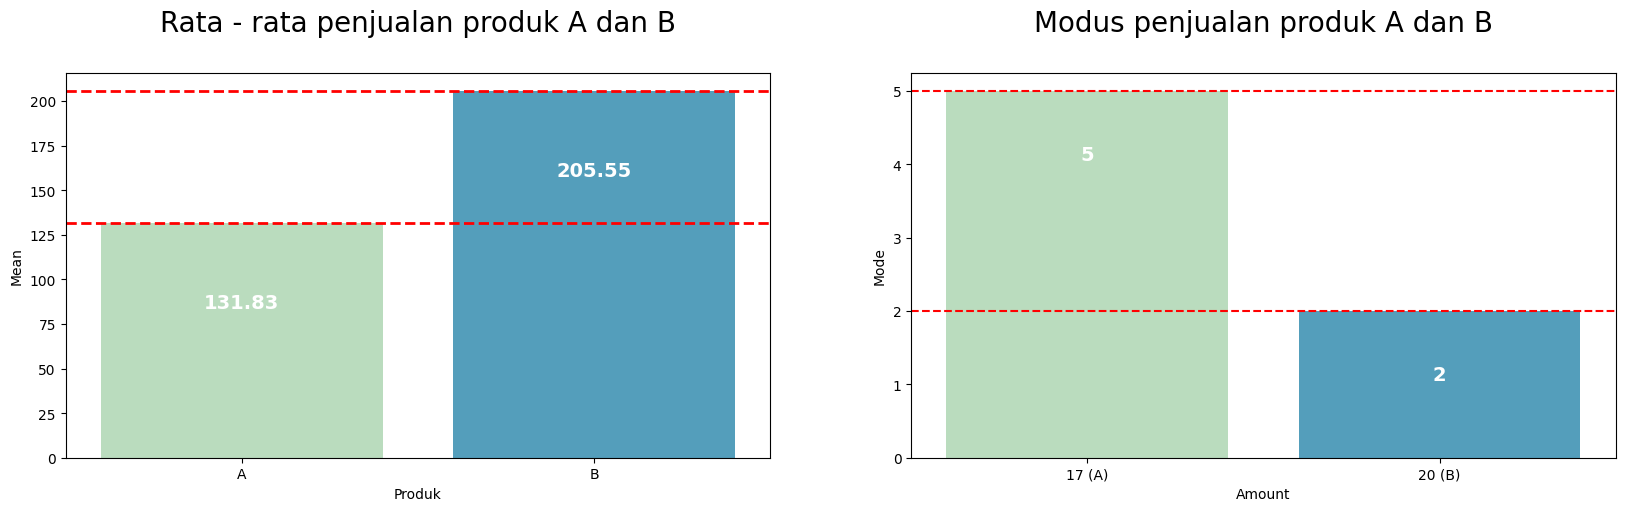

In [201]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
process_mean(ax1)
process_modus(ax2)
process_median()

### Range & IQR

In [202]:
def get_frequency_distribution(data):
    if type(data) == pd.Series:
        data = data.array

    mx, mi = data.max(), data.min()
    R = mx - mi
    k = np.ceil(1 + 3.3 * np.log10(len(data))).astype(int)
    I = np.ceil(R / k).astype(int)

    classes = []
    ranges  = []
    edge_classes = []
    for i in range(1, k + 1):
        upper = mi + (i - 1) * I
        lower = upper + I - 1
        edge = upper - 0.5
        classes.append(i)
        edge_classes.append(edge)
        ranges.append(f'{upper} - {lower}')
    edge_classes.append(lower + 0.5)

    df = pd.DataFrame(data, columns=['value'])
    df["range"] = pd.cut(df["value"], bins=edge_classes, labels=ranges, include_lowest=True)
    frequency_table = df["range"].value_counts().sort_index()
    relative_frequency = (frequency_table / frequency_table.sum() * 100).round(2)
    midpoints = [
        (edge_classes[i] + edge_classes[i + 1]) / 2 for i in range(len(edge_classes) - 1)
    ]
    frequency_distribution = pd.DataFrame(
        {
            "class": classes,
            "range": frequency_table.index,
            "frequency": frequency_table.values,
            "relative": relative_frequency,
            "midpoint": midpoints,
        }
    )
    frequency_distribution.reset_index(drop=True, inplace=True)

    return frequency_distribution

In [203]:
print(" FREQUENCY DISTRIBUTION PRODUK A ".center(50, "="))
freq_a = get_frequency_distribution(df['sale_a'])
print(freq_a.to_string(index=False))
print(" FREQUENCY DISTRIBUTION PRODUK A".center(50, "="))

======== FREQUENCY DISTRIBUTION PRODUK A =========
 class     range  frequency  relative  midpoint
     1    0 - 57         61     50.41      28.5
     2  58 - 115          3      2.48      86.5
     3 116 - 173         10      8.26     144.5
     4 174 - 231         16     13.22     202.5
     5 232 - 289          7      5.79     260.5
     6 290 - 347          9      7.44     318.5
     7 348 - 405          8      6.61     376.5
     8 406 - 463          7      5.79     434.5
========= FREQUENCY DISTRIBUTION PRODUK A=========


In [204]:
print(" FREQUENCY DISTRIBUTION PRODUK B ".center(50, "="))
freq_b = get_frequency_distribution(df['sale_b'])
print(freq_b.to_string(index=False))
print(" FREQUENCY DISTRIBUTION PRODUK B".center(50, "="))

======== FREQUENCY DISTRIBUTION PRODUK B =========
 class     range  frequency  relative  midpoint
     1    0 - 68         28     23.14      34.0
     2  69 - 137         25     20.66     103.0
     3 138 - 206         18     14.88     172.0
     4 207 - 275         14     11.57     241.0
     5 276 - 344          7      5.79     310.0
     6 345 - 413          8      6.61     379.0
     7 414 - 482         10      8.26     448.0
     8 483 - 551         11      9.09     517.0
========= FREQUENCY DISTRIBUTION PRODUK B=========


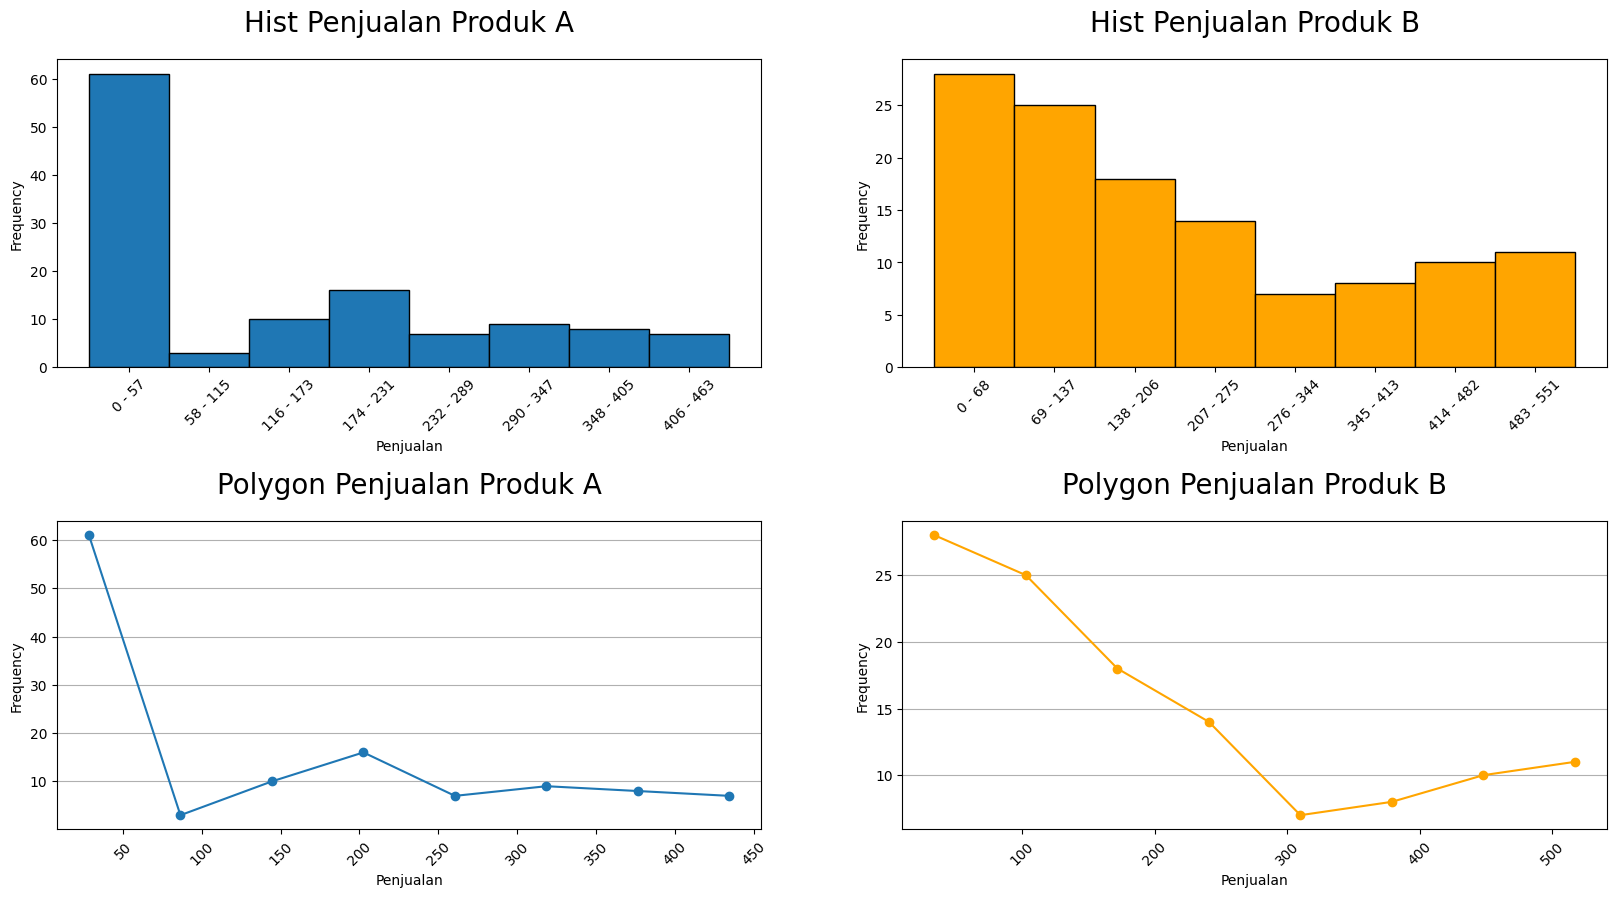

In [205]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 10))
fig.subplots_adjust(hspace=0.5)

# Hist Plot
ax1.set_title("Hist Penjualan Produk A", fontsize=20, pad=20)
ax1.bar(
    freq_a['range'],
    freq_a['frequency'],
    width=1,
    edgecolor='black',
)
ax1.set_xlabel("Penjualan")
ax1.set_ylabel("Frequency")
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y')

ax2.set_title("Hist Penjualan Produk B", fontsize=20, pad=20)
ax2.bar(
    freq_b['range'],
    freq_b['frequency'],
    width=1,
    edgecolor='black',
    color='orange',
)
ax2.set_xlabel("Penjualan")
ax2.set_ylabel("Frequency")
ax2.tick_params(axis='x', rotation=45)
ax1.grid(axis='y')

# Polygon Plot
ax3.set_title("Polygon Penjualan Produk A", fontsize=20, pad=20)
ax3.plot(
    freq_a['midpoint'],
    freq_a['frequency'],
    marker='o',
)
ax3.set_xlabel("Penjualan")
ax3.set_ylabel("Frequency")
ax3.tick_params(axis='x', rotation=45)
ax3.grid(axis='y')

ax4.set_title("Polygon Penjualan Produk B", fontsize=20, pad=20)
ax4.plot(
    freq_b['midpoint'],
    freq_b['frequency'],
    marker='o',
    color='orange',
)
ax4.set_xlabel("Penjualan")
ax4.set_ylabel("Frequency")
ax4.tick_params(axis='x', rotation=45)
ax4.grid(axis='y')

Text(0, 0.5, 'Penjualan')

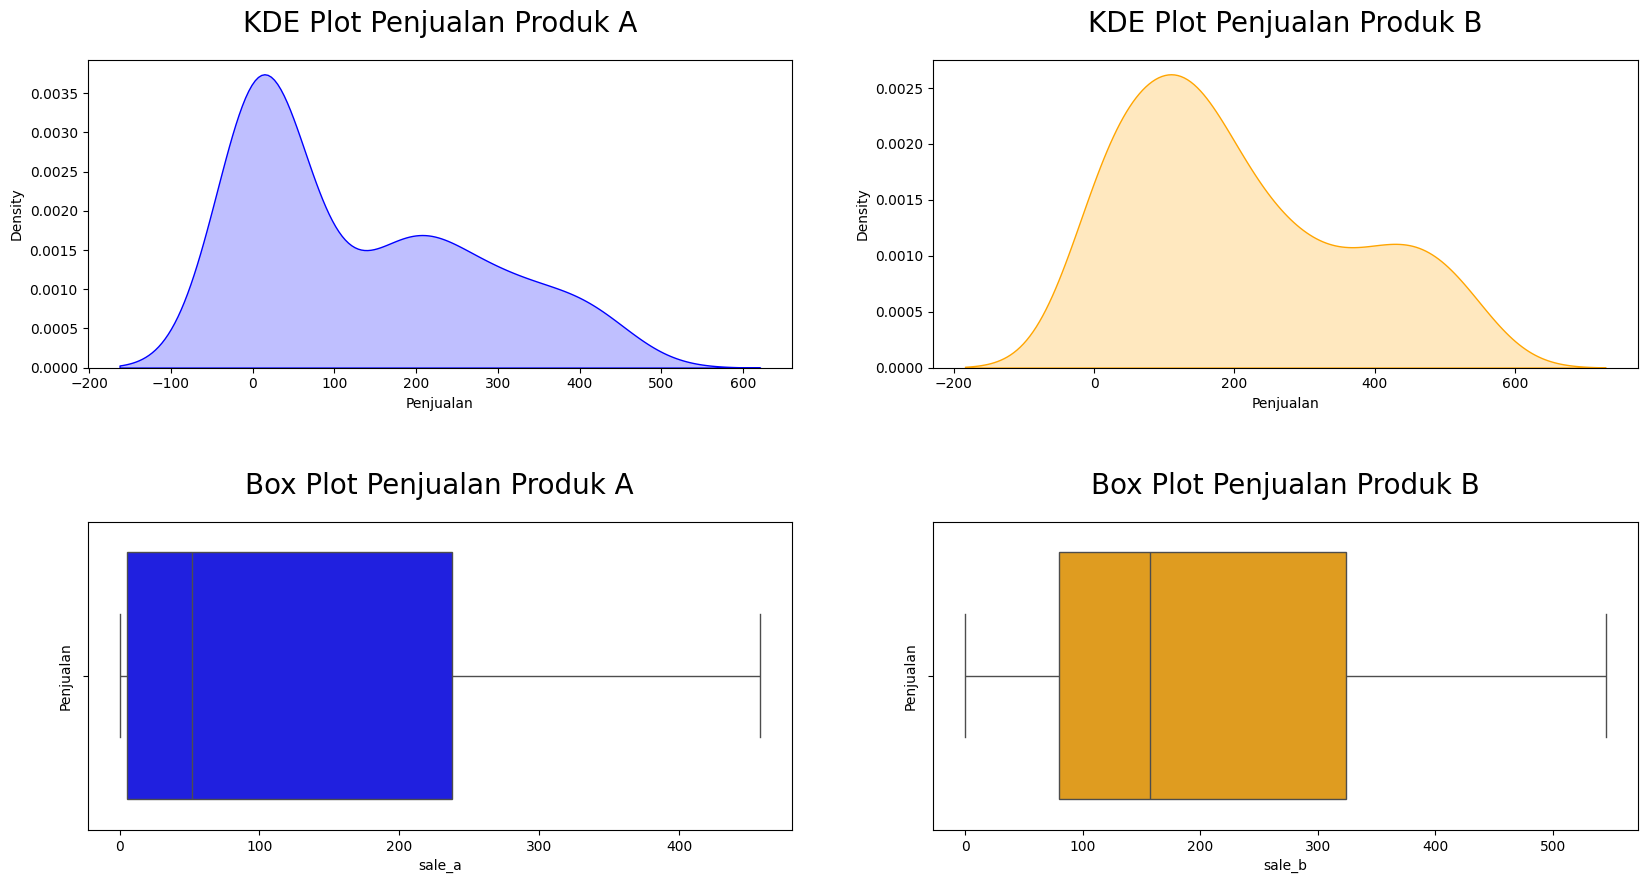

In [206]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 10))
fig.subplots_adjust(hspace=0.5)

# KDE Plot
sns.kdeplot(df['sale_a'], ax=ax1, color='blue', fill=True)
ax1.set_title("KDE Plot Penjualan Produk A", fontsize=20, pad=20)
ax1.set_xlabel("Penjualan")
ax1.set_ylabel("Density")

sns.kdeplot(df['sale_b'], ax=ax2, color='orange', fill=True)
ax2.set_title("KDE Plot Penjualan Produk B", fontsize=20, pad=20)
ax2.set_xlabel("Penjualan")
ax2.set_ylabel("Density")

# Box Plot
sns.boxplot(x=df['sale_a'], ax=ax3, color='blue',)
ax3.set_title("Box Plot Penjualan Produk A", fontsize=20, pad=20)
ax3.set_ylabel("Penjualan")

sns.boxplot(x=df['sale_b'], ax=ax4, color='orange')
ax4.set_title("Box Plot Penjualan Produk B", fontsize=20, pad=20)
ax4.set_ylabel("Penjualan")